## Create Milo object for cross-species comparison

In [1]:
suppressPackageStartupMessages(
{library(SingleCellExperiment)
library(biomaRt)
library(data.table)
library(scater)
library(BiocParallel)
library(scran)
library(miloR)
}
)

In [2]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("miloR")

### 1. Load RDS object 

In [3]:
human_dir <- "/nfs/team292/vl6/FetalReproductiveTract/"

In [4]:
sce <- readRDS(paste0(human_dir, "human_genital_tubercle_mpw_orthologs.rds"))
sce

class: SingleCellExperiment 
dim: 2530 30140 
metadata(0):
assays(3): X raw_counts log_normalised_counts
rownames(2530): ADAMTS5 ADRA1D ... TNNI1 TNNT2
rowData names(267): GeneID.0 GeneName.0 ... highly_variable_nbatches
  highly_variable_intersection
colnames(30140): HD_F_GON14449733_GACCAATTCAACACGT
  HD_F_GON14449733_TGTATTCTCGCTGATA ...
  HD_F_GON12944918_TTTGTCATCATGCAAC HD_F_GON12944918_TTTGTCATCTCCTATA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):

### 2. Format the SCE object with appropriate slots for raw and normalised counts

In [5]:
assay(sce, "counts") <- assay(sce, "raw_counts")
assay(sce, "logcounts") <- assay(sce, "log_normalised_counts")

In [6]:
sce

class: SingleCellExperiment 
dim: 2530 30140 
metadata(0):
assays(5): X raw_counts log_normalised_counts counts logcounts
rownames(2530): ADAMTS5 ADRA1D ... TNNI1 TNNT2
rowData names(267): GeneID.0 GeneName.0 ... highly_variable_nbatches
  highly_variable_intersection
colnames(30140): HD_F_GON14449733_GACCAATTCAACACGT
  HD_F_GON14449733_TGTATTCTCGCTGATA ...
  HD_F_GON12944918_TTTGTCATCATGCAAC HD_F_GON12944918_TTTGTCATCTCCTATA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):

In [7]:
# Remove unnecessary assay slots 
assay(sce, "X") <- NULL
assay(sce, "raw_counts") <- NULL
assay(sce, "log_normalised_counts") <- NULL

### 3. Create Milo object on Harmony embedding

In [8]:
sce_milo <- Milo(sce)

In [9]:
sce_milo

class: Milo 
dim: 2530 30140 
metadata(0):
assays(2): counts logcounts
rownames(2530): ADAMTS5 ADRA1D ... TNNI1 TNNT2
rowData names(267): GeneID.0 GeneName.0 ... highly_variable_nbatches
  highly_variable_intersection
colnames(30140): HD_F_GON14449733_GACCAATTCAACACGT
  HD_F_GON14449733_TGTATTCTCGCTGATA ...
  HD_F_GON12944918_TTTGTCATCATGCAAC HD_F_GON12944918_TTTGTCATCTCCTATA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

In [10]:
nhoods(sce_milo)
nhoodCounts(sce_milo)
nhoodAdjacency(sce_milo)

1 x 1 diagonal matrix of class "ddiMatrix"
     [,1]
[1,]    0

1 x 1 diagonal matrix of class "ddiMatrix"
     [,1]
[1,]    0

1 x 1 diagonal matrix of class "ddiMatrix"
     [,1]
[1,]    0

In [11]:
k_neigh <- 15
n_comp <- 25
prop_indexCell <- 0.05

In [12]:
sce_milo <- buildGraph(sce_milo, k=k_neigh, d=n_comp, reduced.dim="X_pca_harmony", BPPARAM=MulticoreParam(7))

Constructing kNN graph with k:15



In [13]:
sce_milo <- makeNhoods(sce_milo, prop=prop_indexCell, k=k_neigh, d=n_comp, refined=TRUE, reduced_dims="X_pca_harmony")

Checking valid object



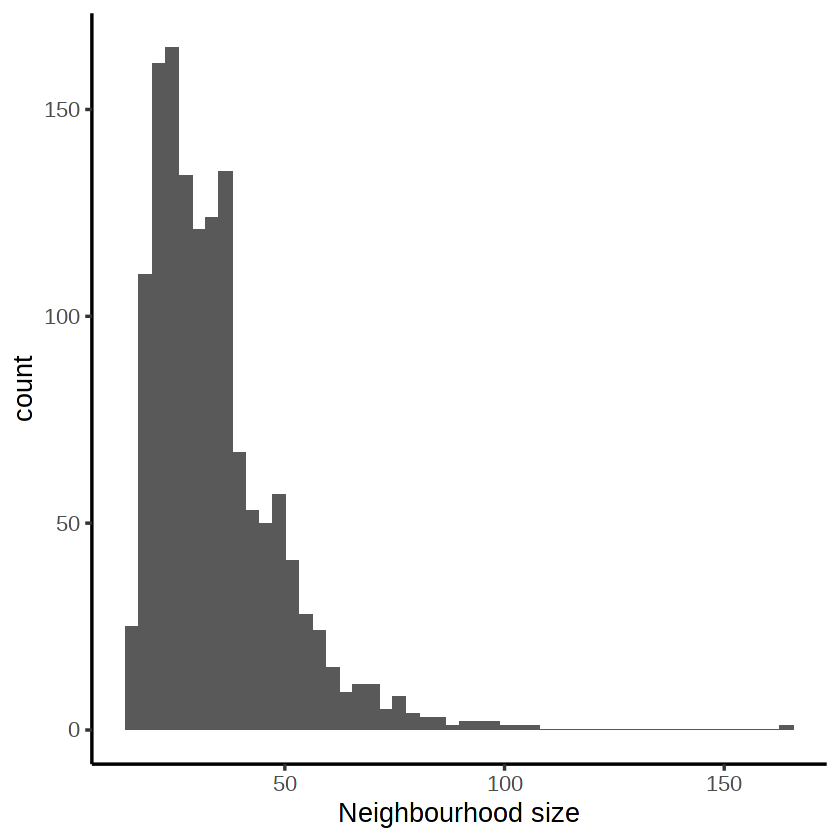

In [14]:
plotNhoodSizeHist(sce_milo)

In [15]:
sce_milo <- buildNhoodGraph(sce_milo)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


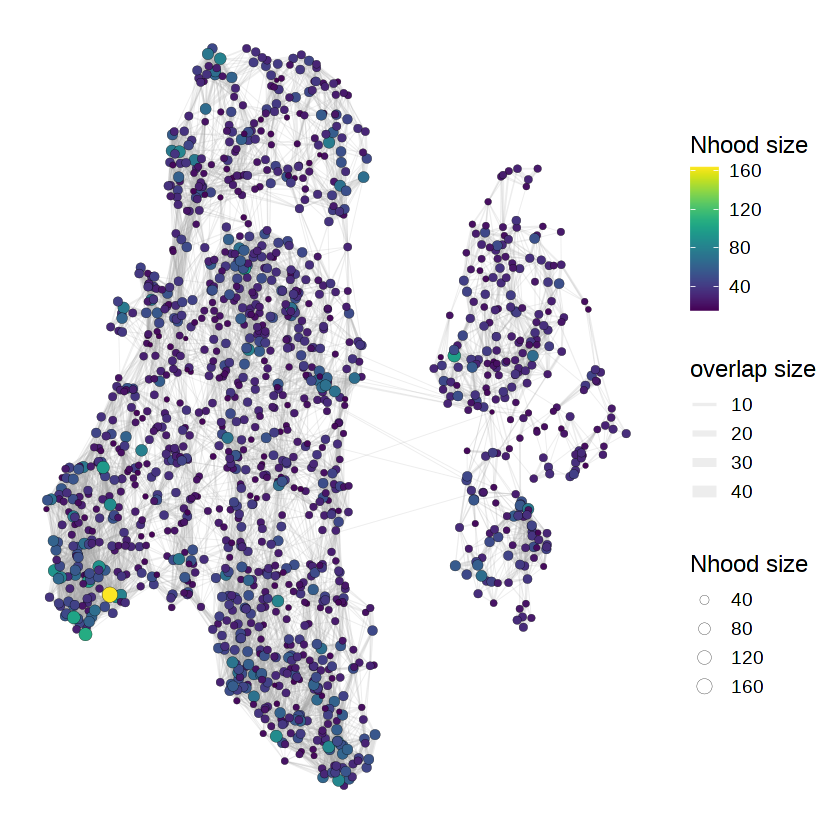

In [16]:
p3 <- plotNhoodGraph(sce_milo, size_range=c(1,4), node_stroke=0.1, layout="UMAP") + 
    viridis::scale_fill_viridis(name = "Nhood size", option = "viridis", direction = 1) 
plot(p3)

### 6. Save Milo object

In [17]:
saveRDS(sce_milo, paste0(human_dir, "human_genital_tubercle_mpw_milo_15knn.rds"))

In [18]:
human_dir

[1] "/nfs/team292/vl6/FetalReproductiveTract/"

In [19]:
#install.packages('argparser')

In [20]:
library(argparser)

In [21]:
prova <- as.data.frame(as.matrix(nhoods(sce_milo)))

In [22]:
rownames(prova) <- colnames(sce_milo)

In [23]:
head(prova)

,24203,4135,4303,27513,17393,17569,10994,14073,18517,798,⋯,11542,8493,23086,15699,3002,21288,12985,9628,25825,11902
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD_F_GON14449733_GACCAATTCAACACGT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HD_F_GON14449733_TGTATTCTCGCTGATA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HD_F_GON14449733_TATCAGGAGATGTAAC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HD_F_GON14449733_GCTTGAAAGTCCAGGA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HD_F_GON14449733_GACTACATCGCCTGAG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HD_F_GON14449733_CCTTTCTTCGTATCAG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
write.csv(prova, paste0(human_dir, "human_genital_tubercle_mpw_milo_15knn.csv"))